In [1]:
'''
비지도 학습(Unsupervised Learning) - 군집화(Clustering)

- K-means Clustering 알고리즘
=> 데이터 간의 유사성 측정 기준으로 중심까지의 거리를 군집화 수행
=> 벡터 공간에 K개의 클러스터가 주어졌을때, 각 클러스터의 중심까지의 거리를 최소화하는 방식으로 동작

ex) 신용카드 사용 패턴 분석, 소비자 행동 분석, 이상치 탐지, 이미지 압축, 이미지 분할, 검색엔진, 유전자 데이터 분석 등

- K-means Clustering 알고리즘 단계

1. K개의 클러스터 중심을 랜덤하게 초기화
2. 각 데이터 포인트를 가장 가까운 클러스터 중심에 할당
3. 각 클러스터의 중심을 새롭게 계산
4. 클러스터 중심이 변하지 않을 때까지 2, 3단계 반복

'''

'\n비지도 학습(Unsupervised Learning) - 군집화(Clustering)\n\n- K-means 알고리즘\n=> 데이터 간의 유사성 측정 기준으로 중심까지의 거리를 군집화 수행\n=> 벡터 공간에 K개의 클러스터가 주어졌을때, 각 클러스터의 중심까지의 거리를 최소화하는 방식으로 동작\n\nex) 신용카드 사용 패턴 분석, 소비자 행동 분석, 이상치 탐지, 이미지 압축, 이미지 분할, 검색엔진, 유전자 데이터 분석 등\n\n- K-means 알고리즘 단계\n\n1. K개의 클러스터 중심을 랜덤하게 초기화\n2. 각 데이터 포인트를 가장 가까운 클러스터 중심에 할당\n3. 각 클러스터의 중심을 새롭게 계산\n4. 클러스터 중심이 변하지 않을 때까지 2, 3단계 반복\n\n'

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('../ML_data/Wholesale customers data.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [9]:
# 데이터 보기

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [10]:
from sklearn.cluster import KMeans 

kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, random_state=0)
# n_clusters : 군집화할 개수
# N_ init : 초기 중심 설정 방식

In [13]:
kmeans.fit(df)
cluster_labels = kmeans.labels_
cluster_labels

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 4, 4, 1, 0, 0, 0, 1, 4, 1, 0, 1, 0, 1,
       0, 2, 0, 0, 1, 1, 4, 0, 0, 1, 0, 0, 1, 4, 0, 4, 4, 3, 0, 0, 4, 4,
       1, 4, 4, 2, 1, 4, 1, 1, 0, 4, 0, 1, 4, 4, 1, 1, 1, 2, 1, 4, 1, 2,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 4, 1, 1, 1, 4, 4, 0, 1, 2, 2, 3,
       1, 0, 1, 1, 2, 1, 4, 1, 1, 1, 1, 1, 4, 4, 1, 3, 1, 0, 4, 4, 1, 4,
       1, 4, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 3, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 4, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 4, 4, 0, 1, 4, 4, 1, 1, 4, 1, 4, 1, 1, 1, 1, 4, 4, 1, 4, 1, 4,
       3, 1, 1, 1, 1, 3, 4, 3, 1, 1, 1, 1, 4, 4, 0, 1, 1, 4, 1, 0, 0, 4,
       1, 1, 4, 4, 0, 1, 1, 4, 1, 1, 1, 4, 0, 2, 1, 1, 4, 4, 4, 0, 4, 1,
       1, 4, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 3, 0, 0,
       0, 1, 4, 4, 1, 1, 0, 1, 1, 2, 1, 0, 1, 0, 1, 1, 3, 3, 1, 1, 0, 1,
       4, 4, 4, 0, 4, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 3, 0, 3, 0,
       1, 0, 0, 0, 1, 1, 1, 4, 0, 1, 0, 1, 1, 1, 0,

In [15]:
df['Cluster'] = cluster_labels
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,2,3,12669,9656,7561,214,2674,1338,1
1,2,3,7057,9810,9568,1762,3293,1776,1
2,2,3,6353,8808,7684,2405,3516,7844,1
3,1,3,13265,1196,4221,6404,507,1788,1
4,2,3,22615,5410,7198,3915,1777,5185,0


In [18]:
df.Cluster.value_counts()

Cluster
1    225
0    106
4     86
3     13
2     10
Name: count, dtype: int64

<Axes: xlabel='Milk', ylabel='Detergents_Paper'>

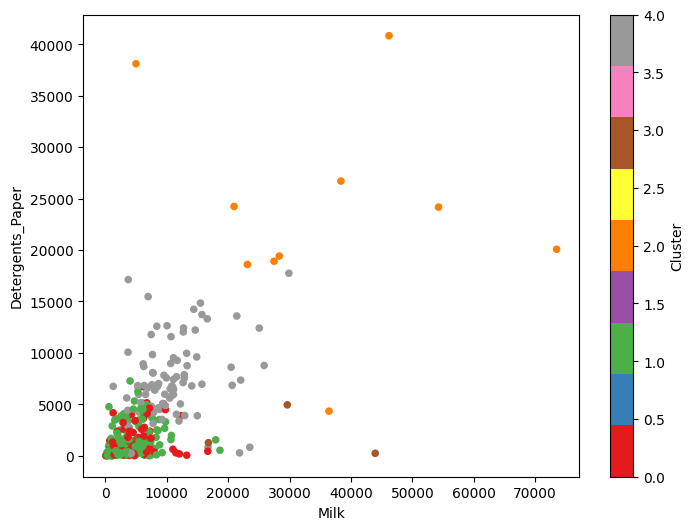

In [27]:
df.plot(kind = 'scatter', x='Milk', y='Detergents_Paper', c='Cluster', cmap='Set1', colorbar=True, figsize=(8,6))

In [35]:
from sklearn.datasets import load_iris

iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
iris_df.head()

# PCA는 여러 속성의 값을 연산해야 하므로 속성의 스케일이 영향을 받는다.
# PCA = Principal Component Analysis : 주성분 분석

from sklearn.preprocessing import StandardScaler

# target 값을 제외한 나머지 속성에 스케일링 적용
iris_scaler = StandardScaler().fit_transform(iris_df.iloc[:,:-1])

iris_scaler[:3]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ]])

In [36]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

# fit , transform을 호출하여 PCA 변환 데이터 반환
pca.fit(iris_scaler)
iris_pca = pca.transform(iris_scaler)
print(iris_pca.shape)

(150, 2)


In [38]:
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


In [ ]:
# PCA 변환된 데이터의 컬럼명을 Component1, Component2로 변경
pca_columns = ['Component1', 'Component2']